### 1. 라벨 인코딩(Label Encoding)

- 데이터프레임 생성 (고객 ID + 연체 여부)
- 고객 ID("customer") , 
- 변수 : 판매액("sales"), 소득액("income"), 금리( "interest"), 대출금("loans"), 
- 연체여부("status"): 정상, 연체

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    "customer":  [f"고객{i}" for i in range(1, 13)],
    "sales":     [100, 120, 130, 140, 150, 200, 220, 180, 190, 200, 210, 120],
    "income":    [10, 12, 13, 14, 15, 16, 17, 20, 22, 19, 20, 22],
    "interest":  [1.2, 1.5, 1.4, 1.3, 1.4, 1.5, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5],
    "loans": [100, 105, 102, 103, 104, 104, 105, 105, 103, 102, 104, 105],
    "status": [
        "정상", "정상", "연체", "정상", "정상", "정상",
        "정상", "정상", "정상", "정상", "연체", "연체"
    ]
})

df




,customer,sales,income,interest,loans,status
0,고객1,100,10,1.2,100,정상
1,고객2,120,12,1.5,105,정상
2,고객3,130,13,1.4,102,연체
3,고객4,140,14,1.3,103,정상
4,고객5,150,15,1.4,104,정상
5,고객6,200,16,1.5,104,정상
6,고객7,220,17,1.4,105,정상
7,고객8,180,20,1.4,105,정상
8,고객9,190,22,1.4,103,정상
9,고객10,200,19,1.5,102,정상


##### 연체 여부 라벨 인코딩

In [3]:
# 범주형 변수(정상/연체)를 머신러닝이 이해할 수 있는 숫자로 변환

In [4]:
df["status_label"] = df["status"].map({"정상": 0, "연체": 1})

df

,customer,sales,income,interest,loans,status,status_label
0,고객1,100,10,1.2,100,정상,0
1,고객2,120,12,1.5,105,정상,0
2,고객3,130,13,1.4,102,연체,1
3,고객4,140,14,1.3,103,정상,0
4,고객5,150,15,1.4,104,정상,0
5,고객6,200,16,1.5,104,정상,0
6,고객7,220,17,1.4,105,정상,0
7,고객8,180,20,1.4,105,정상,0
8,고객9,190,22,1.4,103,정상,0
9,고객10,200,19,1.5,102,정상,0


In [ ]:
# # 방법 2: LabelEncoder 사용 (참고용)
# # LabelEncoder는 알파벳/사전순으로 인코딩합니다.
# # 현재는:['연체', '정상']→ 연체: 0, 정상: 1

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df["status_label"] = le.fit_transform(df["status"])

# # 클래스 확인
# print(le.classes_)

# df

##### 기초 통계량 확인

In [8]:
# 전체 숫자형 변수 기초통계
# count (개수)
# mean (평균)
# std (표준편차)
# min / max
# 사분위수(Q1, Q2, Q3)

df.describe()


,sales,income,interest,loans,status_label
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,163.333333,16.666667,1.416667,103.500000,0.250000
std,41.194292,3.984820,0.093744,1.566699,0.452267
min,100.000000,10.000000,1.200000,100.000000,0.000000
25%,127.500000,13.750000,1.400000,102.750000,0.000000
50%,165.000000,16.500000,1.400000,104.000000,0.000000
75%,200.000000,20.000000,1.500000,105.000000,0.250000
max,220.000000,22.000000,1.500000,105.000000,1.000000


##### 연체 여부(라벨) 분포 확인

In [9]:
df["status"].value_counts()


status
정상    9
연체    3
Name: count, dtype: int64

##### 연체 여부별 평균 비교

In [10]:
df.groupby("status")[["sales", "income", "interest", "loans"]].mean()


,sales,income,interest,loans
status,,,,
연체,153.333333,18.333333,1.466667,103.666667
정상,166.666667,16.111111,1.400000,103.444444


### 2. 표준화 전 후 비교

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [12]:
# 표준화할 변수 선택
features = ["sales", "income", "interest", "loans"]

scaler = StandardScaler()

# 표준화 수행
scaled_values = scaler.fit_transform(df[features])

# 표준화된 데이터프레임
df_scaled = df.copy()
df_scaled[[f"{col}_std" for col in features]] = scaled_values

df_scaled


,customer,sales,income,interest,loans,status,status_label,sales_std,income_std,interest_std,loans_std
0,고객1,100,10,1.2,100,정상,0,-1.605793,-1.747408,-2.414039,-2.333333
1,고객2,120,12,1.5,105,정상,0,-1.098701,-1.223186,0.928477,1.000000
2,고객3,130,13,1.4,102,연체,1,-0.845154,-0.961074,-0.185695,-1.000000
3,고객4,140,14,1.3,103,정상,0,-0.591608,-0.698963,-1.299867,-0.333333
4,고객5,150,15,1.4,104,정상,0,-0.338062,-0.436852,-0.185695,0.333333
5,고객6,200,16,1.5,104,정상,0,0.929670,-0.174741,0.928477,0.333333
6,고객7,220,17,1.4,105,정상,0,1.436762,0.087370,-0.185695,1.000000
7,고객8,180,20,1.4,105,정상,0,0.422577,0.873704,-0.185695,1.000000
8,고객9,190,22,1.4,103,정상,0,0.676123,1.397926,-0.185695,-0.333333
9,고객10,200,19,1.5,102,정상,0,0.929670,0.611593,0.928477,-1.000000


In [13]:
# 표준화 전
df[features].describe()

,sales,income,interest,loans
count,12.000000,12.000000,12.000000,12.000000
mean,163.333333,16.666667,1.416667,103.500000
std,41.194292,3.984820,0.093744,1.566699
min,100.000000,10.000000,1.200000,100.000000
25%,127.500000,13.750000,1.400000,102.750000
50%,165.000000,16.500000,1.400000,104.000000
75%,200.000000,20.000000,1.500000,105.000000
max,220.000000,22.000000,1.500000,105.000000


In [14]:
# 표준화 후
df_scaled[[f"{col}_std" for col in features]].describe()

,sales_std,income_std,interest_std,loans_std
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,-2.775558e-16,-3.330669e-16,-1.239749e-15,-3.700743e-17
std,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00
min,-1.605793e+00,-1.747408e+00,-2.414039e+00,-2.333333e+00
25%,-9.085408e-01,-7.644910e-01,-1.856953e-01,-5.000000e-01
50%,4.225771e-02,-4.368520e-02,-1.856953e-01,3.333333e-01
75%,9.296697e-01,8.737041e-01,9.284767e-01,1.000000e+00
max,1.436762e+00,1.397926e+00,9.284767e-01,1.000000e+00


In [15]:
# 연체 여부별 평균 비교 (표준화 후)
df_scaled.groupby("status")[
    [f"{col}_std" for col in features]
].mean()



,sales_std,income_std,interest_std,loans_std
status,,,,
연체,-0.253546,0.436852,0.557086,0.111111
정상,0.084515,-0.145617,-0.185695,-0.037037


In [16]:
# 표준화 전·후 비교 한눈에 보기

compare_df = pd.DataFrame({
    "Before_mean": df[features].mean(),
    "After_mean": df_scaled[[f"{c}_std" for c in features]].mean().values,
    "Before_std": df[features].std(),
    "After_std": df_scaled[[f"{c}_std" for c in features]].std().values
})

compare_df


,Before_mean,After_mean,Before_std,After_std
sales,163.333333,-2.775558e-16,41.194292,1.044466
income,16.666667,-3.330669e-16,3.984820,1.044466
interest,1.416667,-1.239749e-15,0.093744,1.044466
loans,103.500000,-3.700743e-17,1.566699,1.044466


In [17]:
# 표준화 대상 변수 목록 다시 정의

features = ["sales", "income", "interest", "loans"]

compare_df = pd.DataFrame({
    "Before_mean": df[features].mean(),
    "After_mean": df_scaled[[f"{c}_std" for c in features]].mean().values,
    "Before_std": df[features].std(),
    "After_std": df_scaled[[f"{c}_std" for c in features]].std().values
})

compare_df



,Before_mean,After_mean,Before_std,After_std
sales,163.333333,-2.775558e-16,41.194292,1.044466
income,16.666667,-3.330669e-16,3.984820,1.044466
interest,1.416667,-1.239749e-15,0.093744,1.044466
loans,103.500000,-3.700743e-17,1.566699,1.044466


### 3. 상관분석, 히트맵

#### 상관분석

In [18]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [19]:
# 데이터
# 기업 월매출액("sales") , 고객 월소득수준("income"), 월 금리수준("interest"), 월 물가현황("inflation")
df = pd.DataFrame({
    "sales":     [100, 120, 130, 140, 150, 200, 220, 180, 190, 200, 210, 120],
    "income":    [10, 12, 13, 14, 15, 16, 17, 20, 22, 19, 20, 22],
    "interest":  [1.2, 1.5, 1.4, 1.3, 1.4, 1.5, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5],
    "inflation": [100, 105, 102, 103, 104, 104, 105, 105, 103, 102, 104, 105]
})


##### scatter plot

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (한글 깨짐 방지 – Windows 기준)

from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [21]:
# 종속변수(sales) vs 설명변수 산점도 (가장 중요)
# 회귀분석 전 반드시 보는 형태, 여기서는 변수간 관계가 볼 예정

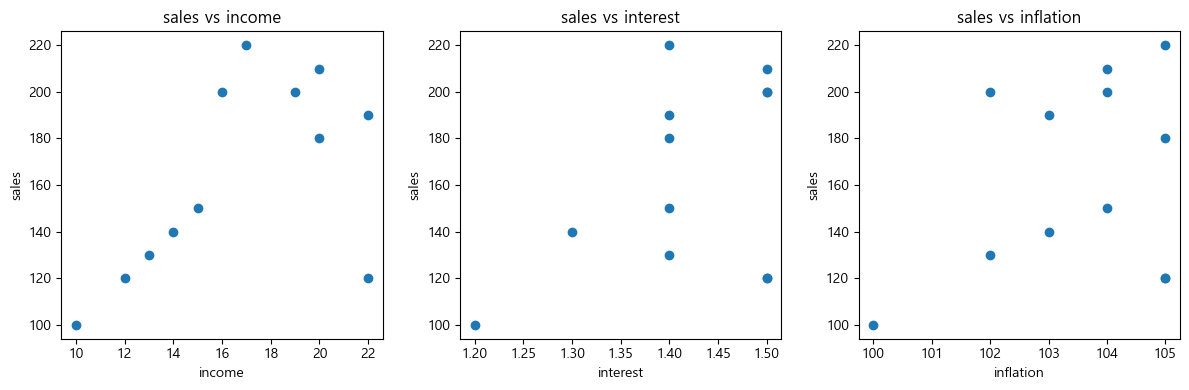

In [22]:
features = ["income", "interest", "inflation"]

plt.figure(figsize=(12, 4))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[col], df["sales"])
    plt.xlabel(col)
    plt.ylabel("sales")
    plt.title(f"sales vs {col}")

plt.tight_layout()
plt.show()


##### 모든 변수 간 산점도 한 번에 (pairplot)

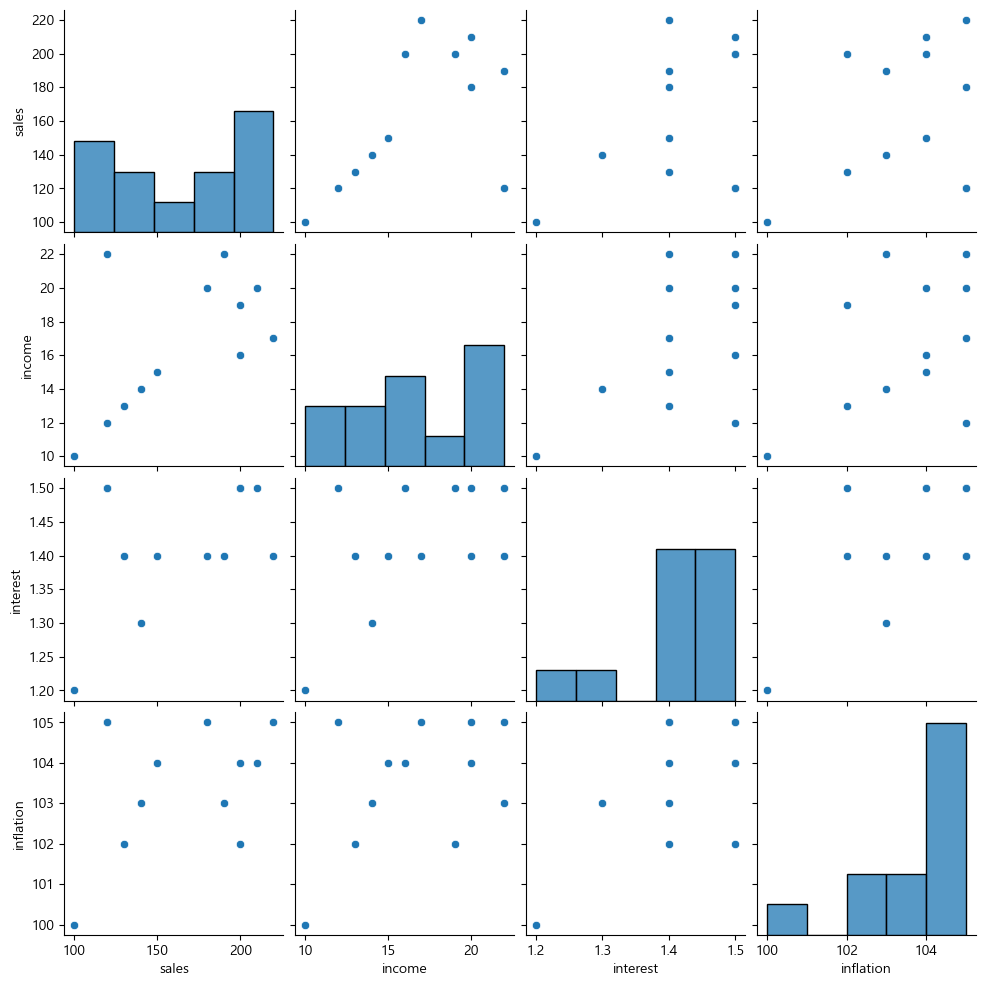

In [52]:
sns.pairplot(df)
plt.show()


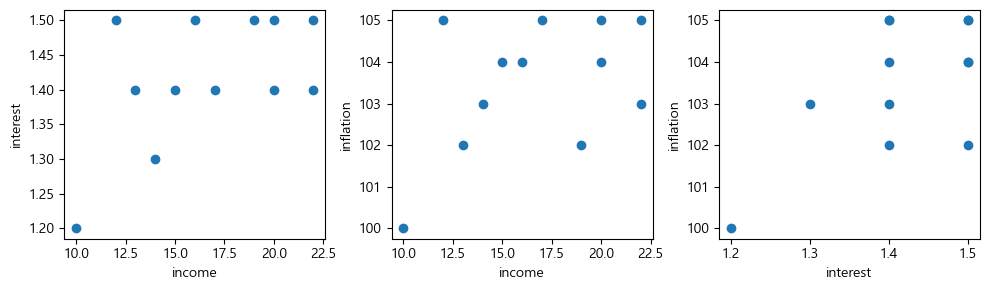

In [53]:
# 설명변수 간 산점도 (다중공선성 확인용)
X_cols = ["income", "interest", "inflation"]

plt.figure(figsize=(10, 3))
plot_idx = 1

for i in range(len(X_cols)):
    for j in range(i+1, len(X_cols)):
        plt.subplot(1, 3, plot_idx)
        plt.scatter(df[X_cols[i]], df[X_cols[j]])
        plt.xlabel(X_cols[i])
        plt.ylabel(X_cols[j])
        plot_idx += 1

plt.tight_layout()
plt.show()


##### 변수쌍별 상관계수 & p-value 출력 (통계적 유의성)

In [54]:


variables = df.columns

corr_result = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        r, p = pearsonr(df[var1], df[var2])
        corr_result.append([var1, var2, r, p])

corr_df = pd.DataFrame(
    corr_result,
    columns=["Variable 1", "Variable 2", "Pearson r", "p-value"]
)

corr_df


,Variable 1,Variable 2,Pearson r,p-value
0,sales,income,0.572271,0.051845
1,sales,interest,0.431588,0.161231
2,sales,inflation,0.323976,0.304269
3,income,interest,0.527289,0.078123
4,income,inflation,0.451414,0.140734
5,interest,inflation,0.618984,0.031869


In [55]:
# 해석 기준 (슬라이드용)
# |r| ≥ 0.7 : 강한 상관
# 0.3 ≤ |r| < 0.7 : 중간
# |r| < 0.3 : 약함
# p-value < 0.05 → 통계적으로 유의

#### 상관계수 히트맵 (숫자 표시 + 색상 구분)

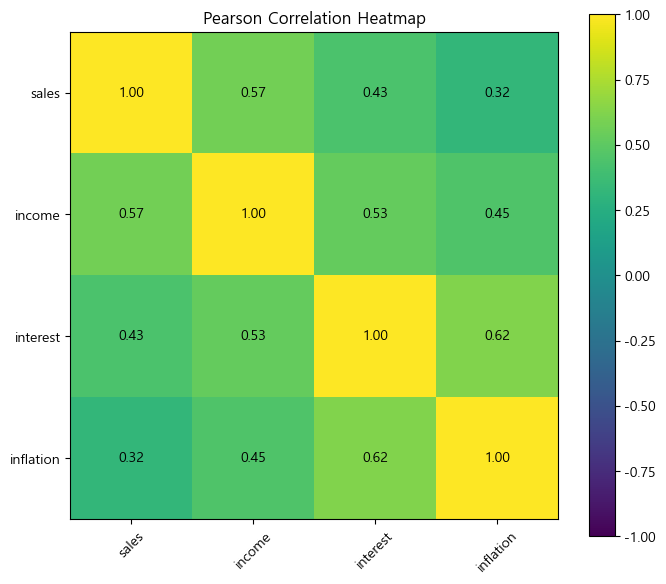

In [56]:
# 상관계수 행렬
corr_matrix = df.corr(method="pearson")

# 히트맵 그리기
plt.figure(figsize=(7, 6))

im = plt.imshow(corr_matrix, vmin=-1, vmax=1)
plt.colorbar(im)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# 셀 안에 상관계수 숫자 표시
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha="center", va="center")

plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.show()


In [57]:
# - 매출–소득: 양(+)의 상관 → 소득 증가 시 매출 증가 경향
# - 매출–금리: 약하거나 음(–)의 상관 가능
# - 소득–물가: 동반 상승 경향 → 다중공선성 가능성 점검 필요

- 주의 할 사항
- 1. 상관관계 ≠ 인과관계
- 2. 표본 수가 작으면 p-value 해석에 주의
- 3. 회귀 전 상관 + VIF 함께 확인

### 4. VIF 계산 (설명변수: income, interest, inflation)

- VIF(분산팽창계수, Variance Inflation Factor) :한 설명변수가 다른 설명변수들과 얼마나 강하게 겹치는지를 나타내는 지표다.
- 즉,설명변수들끼리 비슷한 정보를 주고 있으면 회귀계수가 불안정해짐
- 그 정도를 숫자로 보여주는 것이 VIF
- 왜 문제가 되는가? 
- 둘이 거의 같이 움직이면 모델은 누가 진짜 중요한지 헷갈림
-결과: 계수 부호가 바뀜, p-value 커짐, 해석 신뢰도 ↓

In [58]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 설명변수만 선택
X = df[["income", "interest", "inflation"]]

# 상수항 추가 (VIF 계산 시 권장)
X_const = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame({
    "variable": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

print(vif_df)


    variable          VIF
0      const  6302.938132
1     income     1.435494
2   interest     1.852901
3  inflation     1.680092


- 해석 기준(보편적)
- VIF < 5 : 큰 문제 없음
- 5 ~ 10 : 주의
- 10 이상 : 다중공선성 심각
- ※ const(상수항)는 보통 해석 대상에서 제외